<a href="https://colab.research.google.com/github/Vivek-afk81/breast-cancer-classification-ml/blob/main/classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
os.chdir('/content/drive/My Drive/End_To_End_Classification_project')
print(os.getcwd())

/content/drive/My Drive/End_To_End_Classification_project


#Import the necessary libraries

In [5]:
#visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ML
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#models and metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score

#to produxe reproducible results
RANDOM_STATE=42
np.random.seed(RANDOM_STATE)

#Load and prepare the data

In [6]:
!ls

classification_project.ipynb  data


In [7]:
df=pd.read_csv("/content/drive/My Drive/End_To_End_Classification_project/data/Breast_Cancer.csv")
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


#Exploratory Data Analysis (EDA)

* What kind of dataset this is (size, type, risks)

* Whether the target is balanced

* Which features look predictive

* Why scaling and encoding will matter later

* Why Survival Months needs careful thought*







###Basic data overview

In [8]:
print("Shape of the dataFrame: ",df.shape)
print(" Columns name: ",df.columns)
print("\nData Types: ",df.dtypes)

Shape of the dataFrame:  (4024, 16)
 Columns name:  Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

Data Types:  Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object


Data types:-
 int64, float64, and object

Any numeric stored as object will be flagged later

In [9]:
#Checking if there is any missing values
df.isnull().sum()

,0
Age,0
Race,0
Marital Status,0
T Stage,0
N Stage,0
6th Stage,0
differentiate,0
Grade,0
A Stage,0
Tumor Size,0


###Target Variable Analysis (Status)

Checking

How many classes?

Is it balanced or imbalanced?

What labels are used (strings vs numbers)?

In [10]:
print(df["Status"].value_counts())
print("\n")
print(df["Status"].value_counts(normalize=True))

#we can clearly see the target is imbalanced

Status
Alive    3408
Dead      616
Name: count, dtype: int64


Status
Alive    0.846918
Dead     0.153082
Name: proportion, dtype: float64


###Numerical feature descriptive statistics

Numerical columns are:- Age,
Tumor Size,
Regional Node Examined,
Reginol Node Positive,
Survival Months


In [11]:
numerical_cols=[
    "Age",
    "Tumor Size",
    "Regional Node Examined",
    "Reginol Node Positive",
    "Survival Months"]
df[numerical_cols].describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


###Visualisation

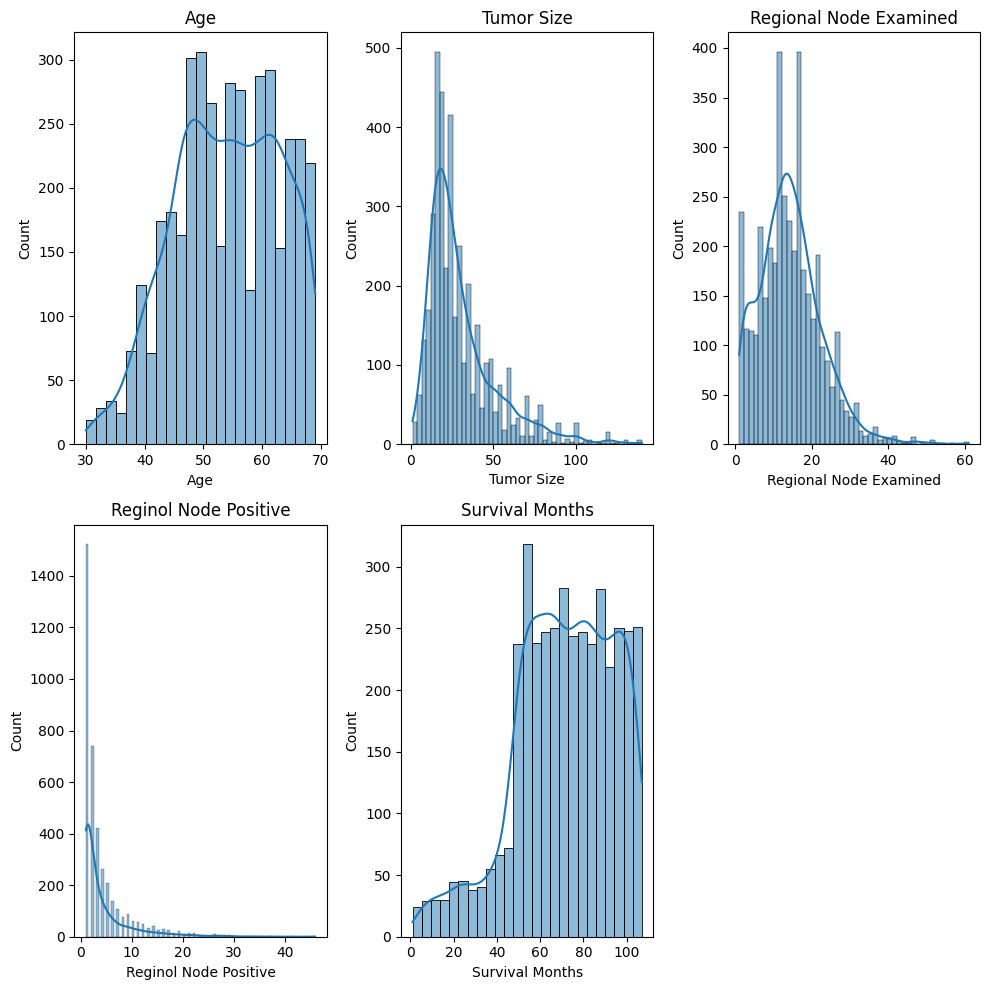

In [12]:
#Distribution plots of the numerical columns

plt.figure(
    figsize=((10,10)))
for i,j in enumerate(numerical_cols,1):
  plt.subplot(2,3,i)
  sns.histplot(df[j],kde=True)
  plt.title(j)

plt.tight_layout()
plt.show()




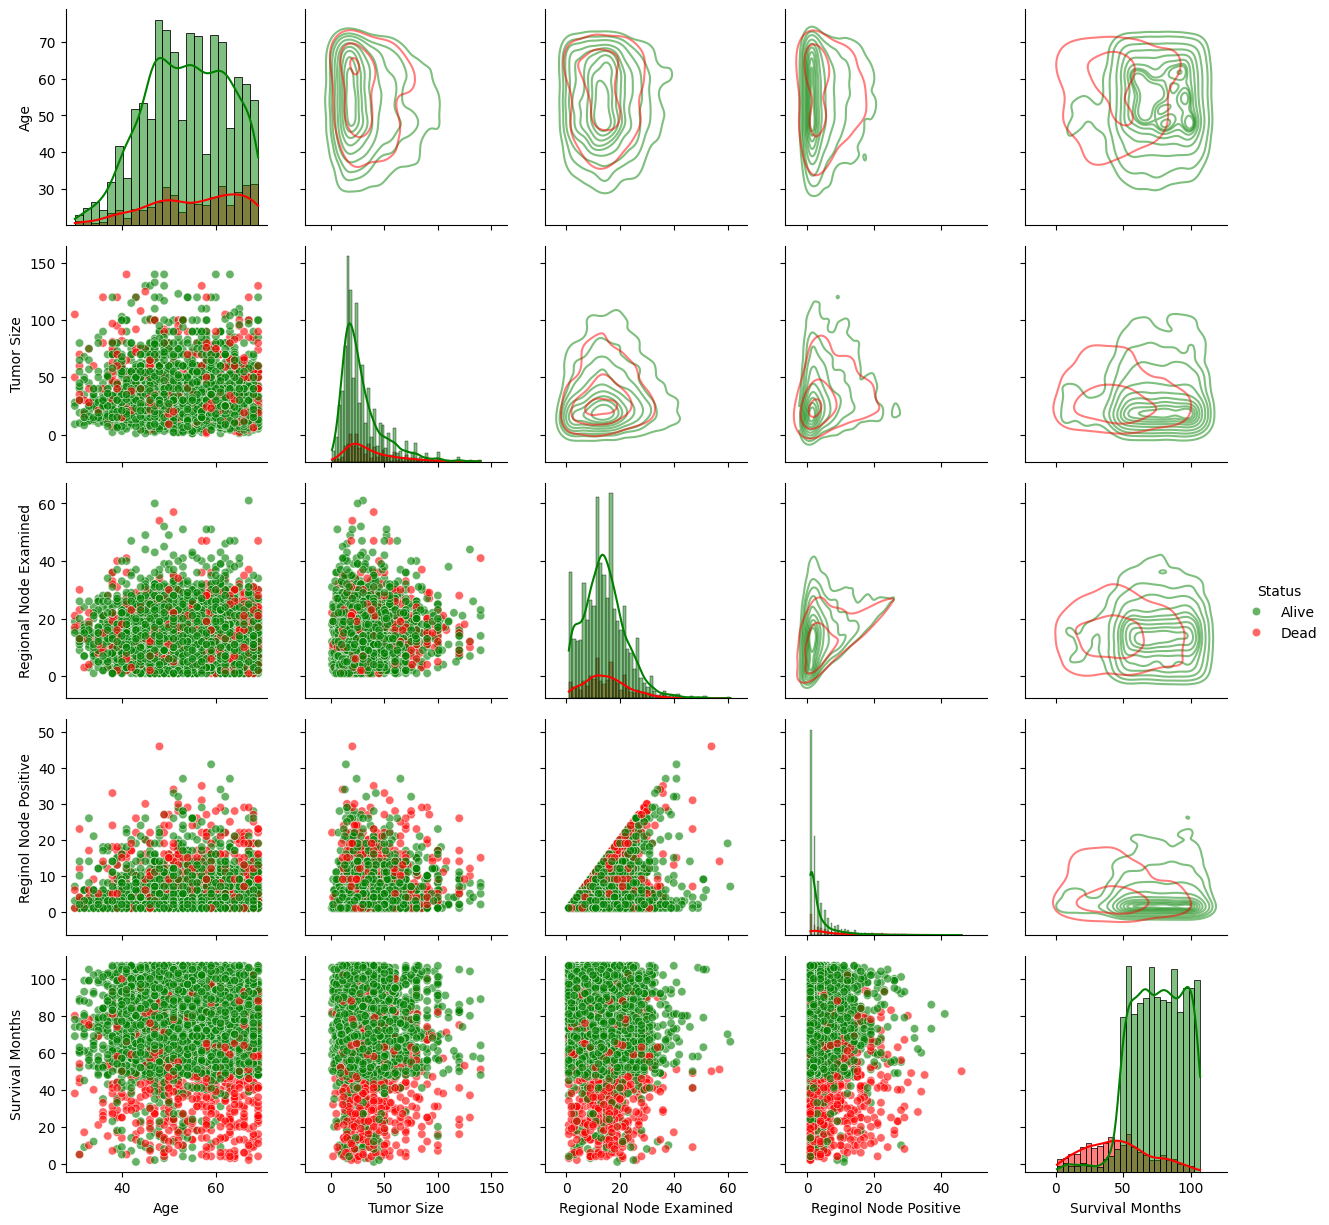

In [13]:
numerical_cols= ["Age", "Tumor Size", "Regional Node Examined", "Reginol Node Positive", "Survival Months"]

# Create the PairGrid
g = sns.PairGrid(
    df,
    vars=numerical_cols,
    hue="Status",
    diag_sharey=False,
    palette={"Alive": "green", "Dead": "red"}
)

# Histograms on the diagonal
g.map_diag(sns.histplot, kde=True)

# KDE plots (upper triangle)
g.map_upper(sns.kdeplot, alpha=0.5)

# Scatterplots (lower triangle)
g.map_lower(sns.scatterplot, alpha=0.6)

g.add_legend()
plt.show()

In [14]:
#Visualising te categorical columns
categorical_cols = [
    "Race",
    "Marital Status",
    "T Stage ",
    "N Stage",
    "Grade",
    "Estrogen Status",
    "Progesterone Status"
]

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())



Race value counts:
Race
White    3413
Other     320
Black     291
Name: count, dtype: int64

Marital Status value counts:
Marital Status
Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: count, dtype: int64

T Stage  value counts:
T Stage 
T2    1786
T1    1603
T3     533
T4     102
Name: count, dtype: int64

N Stage value counts:
N Stage
N1    2732
N2     820
N3     472
Name: count, dtype: int64

Grade value counts:
Grade
2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: count, dtype: int64

Estrogen Status value counts:
Estrogen Status
Positive    3755
Negative     269
Name: count, dtype: int64

Progesterone Status value counts:
Progesterone Status
Positive    3326
Negative     698
Name: count, dtype: int64


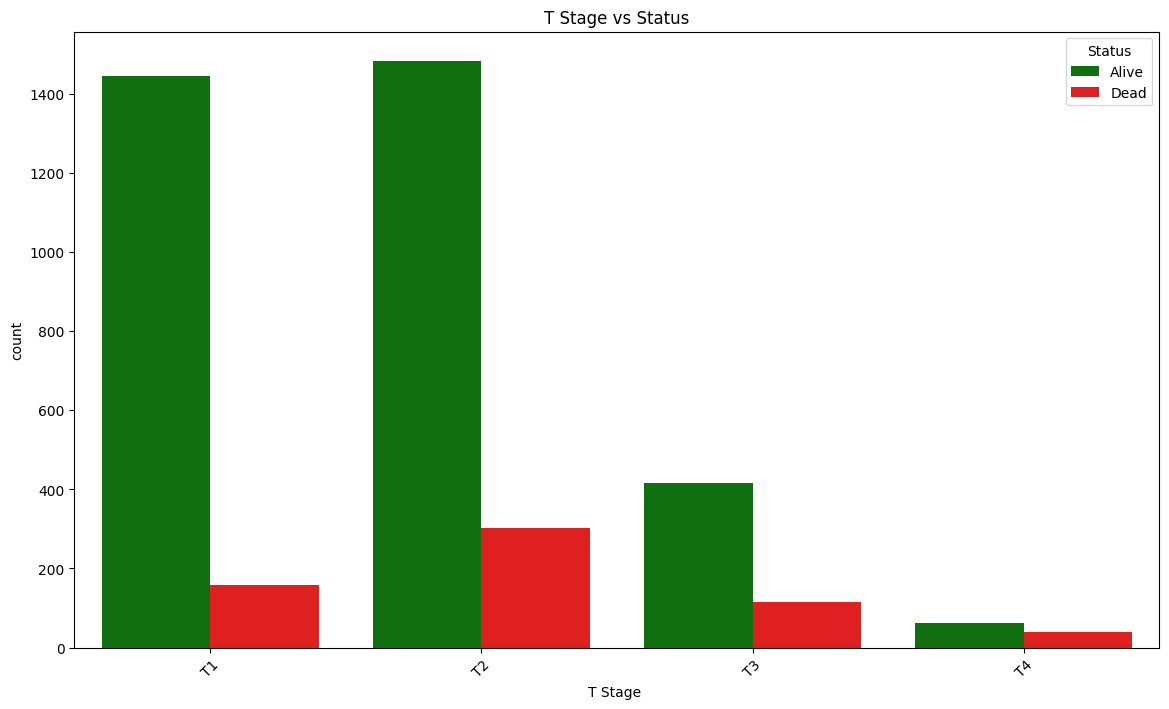

In [15]:
plt.figure(figsize=(14, 8))

sns.countplot(data=df, x="T Stage ", hue="Status",palette={"Alive": "green", "Dead": "red"}) # "T Stage " has an extra space that costed me a lot of time
plt.title("T Stage vs Status")
plt.xticks(rotation=45)
plt.show()


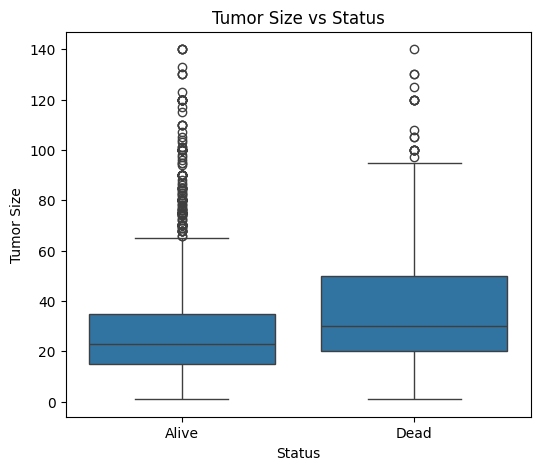

In [16]:
#Box plot
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="Status", y="Tumor Size")
plt.title("Tumor Size vs Status")
plt.show()


The box plot shows that patients who died tend to have larger tumor sizes on average, with a higher median and greater variability compared to patients who are alive. This suggests tumor size is associated with survival outcome, though it is not the only determining factor.

##Data Preprocessing

In [17]:
#Checking if the dataframe is loaded perfectly
assert isinstance(df,pd.DataFrame),"df is not in the pandas dataframe"
df.shape

(4024, 16)

###Cleanining the columns name
like the T STAGE has an extra space,reginol node positive also has a typo

so stripping extra space," " with "_"


In [18]:
df.columns=(
    df.columns
    .str.strip() #for T STAGE
    .str.lower() #everything is in lowercase now
    .str.replace(" ","_")
)

df=df.rename(columns={
    "reginol_node_positive": "regional_node_positive"
})
df.columns

Index(['age', 'race', 'marital_status', 't_stage', 'n_stage', '6th_stage',
       'differentiate', 'grade', 'a_stage', 'tumor_size', 'estrogen_status',
       'progesterone_status', 'regional_node_examined',
       'regional_node_positive', 'survival_months', 'status'],
      dtype='object')

###Defining the target columns and feature columns


In [19]:
X=df.drop("status",axis=1)
y=df["status"]

#Feature shape and target shapes
X.shape,y.shape

((4024, 15), (4024,))

In [20]:
# now lets check how many unique valus are there is in the taret columns
y.unique(),y.value_counts()

(array(['Alive', 'Dead'], dtype=object),
 status
 Alive    3408
 Dead      616
 Name: count, dtype: int64)

In [21]:
## checking if there is any column missmatch or not
set(numerical_cols+categorical_cols)==set(X.columns)

False

In [22]:
# first we have to update the numerical and categorical columns cause we made bunch change in the columns name
numerical_features =[
    "age",
    "tumor_size",
    "regional_node_examined",
    "regional_node_positive",
    "survival_months"
]
categorical_features=[
    "race",
    "marital_status",
    "t_stage",
    "n_stage",
    "6th_stage",
    "differentiate",
    "grade",
    "a_stage",
    "estrogen_status",
    "progesterone_status"
]

#now moment of truth
set(numerical_features+categorical_features)==set(X.columns)

True

## Time for Encoding, Scaling, Splitting, ...

####Encoding


In [23]:
#encoding the target values
y=y.map({
    "Alive":0,
    "Dead":1
})
y.value_counts()

,count
status,
0,3408
1,616


Encoding the the categorical and numerical features

note: there are three types of features on clear inspection
1. numerical features
2. categorical features
3. ordinal features(here orders matters like stage III>stage II actually means something)

In [24]:
ordinal_features=[
    "t_stage",
    "n_stage",
    "6th_stage",
    "grade",
    "differentiate",
    "a_stage"
]

categorical_features=[
    "race",
    "marital_status",
    "estrogen_status",
    "progesterone_status"
]

numeric_features=[
    "age",
    "tumor_size",
    "regional_node_examined",
    "regional_node_positive",
    "survival_months"
]

ordinal_encoder=OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1)
onehot_encoder=OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False
)

#Scaling
scaler=StandardScaler()

In [25]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',scaler,numeric_features),
        ('ord',ordinal_encoder,ordinal_features),
        ('cat',onehot_encoder,categorical_features)
    ],
    remainder="passthrough"
)

####Splitting the data using train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=.3,
    stratify=y,   #Preserves class distribution
    random_state=RANDOM_STATE
)

X_train.shape,X_test.shape

((2816, 15), (1208, 15))

####Fitting the data


In [27]:
X_trn_pre=preprocessor.fit_transform(X_train)
X_tst_pre=preprocessor.transform(X_test)

X_trn_pre.shape,X_tst_pre.shape

((2816, 23), (1208, 23))

In [28]:
pd.DataFrame(X_trn_pre)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.215921,-0.014272,-1.288769,-0.227961,-0.261942,1.0,0.0,1.0,2.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.128467,-0.493301,0.328731,-0.619626,0.528516,0.0,0.0,0.0,1.0,3.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.657734,-0.732816,-0.542230,1.142867,-1.228058,0.0,2.0,4.0,2.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-2.332297,0.464757,0.577578,2.513694,-2.677233,1.0,2.0,4.0,3.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.546096,-0.157981,1.199693,1.534532,1.231146,1.0,2.0,4.0,3.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,-1.885746,0.225242,0.453155,2.709527,0.265030,1.0,2.0,4.0,3.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2812,-0.769371,0.943786,-0.293384,0.555369,0.001544,1.0,1.0,2.0,2.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2813,1.240104,0.081534,-1.537615,-0.619626,0.396773,1.0,0.0,1.0,1.0,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2814,-0.099546,0.464757,0.328731,-0.619626,-2.765061,1.0,0.0,1.0,3.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# TRAINING ML MODELS

###k-Nearest Neighbors (kNN)

kNN assumes patients with similar clinical profiles have similar outcomes, so preprocessing ensures clinical similarity maps to geometric proximity.

####Build a kNN pipeline

In [29]:
from sklearn.pipeline import Pipeline

knn_pipeline=Pipeline(
    steps=[
        ("preprocessing",preprocessor),
        ("knn",KNeighborsClassifier())
    ]
)

####Hyperparameter tuning


1.   n_neighbors(k)

*   Small k → noisy, high variance
*   Large k → smoother, high bias


2.   weights

*   "uniform" → all neighbors equal
*   "distance" → closer neighbors matter more (often better in medical data)


We will use cross validation because Single train/val split is unstable


In [30]:
from sklearn.model_selection import GridSearchCV

param_grid={
    "knn__n_neighbors": list(range(3, 31, 2)),  # only odd values are taken
    "knn__weights": ["uniform", "distance"]

}

grid_search=GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'tumor_size',
                                                                          'regional_node_examined',
                                                                          'regional_node_positive',
                                                                          'survival_months']),
                                                                        ('ord',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['t_stage',
                                                                          'n_stage',
                                                                          '6th_stage',
                                                                          'grade',
                                                                          'differentiate',
                                                                          'a_stage']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['race',
                                                                          'marital_status',
                                                                          'estrogen_status',
                                                                          'progesterone_status'])])),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19,
                                              21, 23, 25, 27, 29],
                         'knn__weights': ['uniform', 'distance']},
             scoring='f1')

In [31]:
grid_search.best_params_, grid_search.best_score_


({'knn__n_neighbors': 3, 'knn__weights': 'uniform'},
 np.float64(0.4800873864772101))

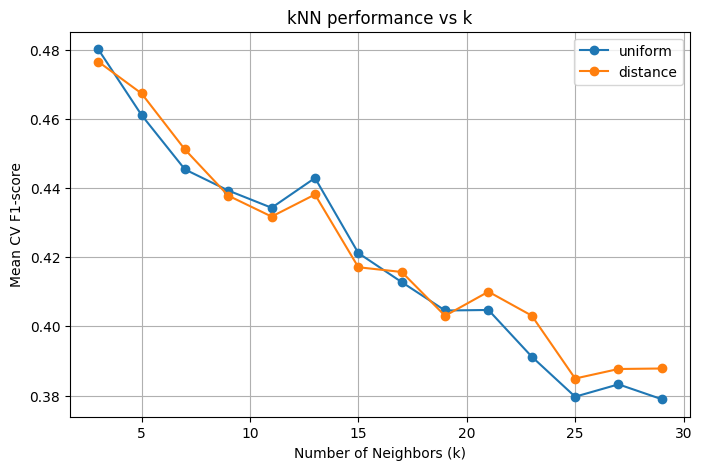

In [32]:
results=pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(8,5))
for w in ["uniform","distance"]:
  subset=results[results["param_knn__weights"] == w]
  plt.plot(
    subset["param_knn__n_neighbors"],
    subset["mean_test_score"],
    marker="o",
    label=w
)

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean CV F1-score")
plt.title("kNN performance vs k")
plt.legend()
plt.grid(True)
plt.show()


#Evaluating best kNN on the test set

In [33]:
best_knn = grid_search.best_estimator_

y_pred_knn = best_knn.predict(X_test)
y_proba_knn = best_knn.predict_proba(X_test)[:, 1]

knn_results = {
    "accuracy": accuracy_score(y_test, y_pred_knn),
    "precision": precision_score(y_test, y_pred_knn),
    "recall": recall_score(y_test, y_pred_knn),
    "f1": f1_score(y_test, y_pred_knn),
    "roc_auc": roc_auc_score(y_test, y_proba_knn)
}

knn_results


{'accuracy': 0.8758278145695364,
 'precision': 0.6470588235294118,
 'recall': 0.41621621621621624,
 'f1': 0.506578947368421,
 'roc_auc': np.float64(0.7377902829515733)}

##Other Classification Models (Baseline → Non-linear → Boosting)

In [34]:
#Logistic Regression pipeline
logreg_pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("logreg", LogisticRegression(
            max_iter=1000,
            random_state=RANDOM_STATE
        ))
    ]
)

logreg_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'tumor_size',
                                                   'regional_node_examined',
                                                   'regional_node_positive',
                                                   'survival_months']),
                                                 ('ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['t_stage', 'n_stage',
                                                   '6th_stage', 'grade',
                                                   'differentiate',
                                                   'a_stage']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['race', 'marital_status',
                                                   'estrogen_status',
                                                   'progesterone_status'])])),
                ('logreg', LogisticRegression(max_iter=1000, random_state=42))])

In [35]:
#Random Forest pipeline
rf_pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("rf", RandomForestClassifier(
            n_estimators=300,
            random_state=RANDOM_STATE,
            n_jobs=-1
        ))
    ]
)

rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'tumor_size',
                                                   'regional_node_examined',
                                                   'regional_node_positive',
                                                   'survival_months']),
                                                 ('ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['t_stage', 'n_stage',
                                                   '6th_stage', 'grade',
                                                   'differentiate',
                                                   'a_stage']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['race', 'marital_status',
                                                   'estrogen_status',
                                                   'progesterone_status'])])),
                ('rf',
                 RandomForestClassifier(n_estimators=300, n_jobs=-1,
                                        random_state=42))])